In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [27]:
clasificicacion_dataset_original_train = pd.read_csv('../../datasets/covid/train.txt',sep=' ')
recortes_entrenamiento = pd.read_csv('../../datasets/covid/recortes_cnn/train_detect_0.7_conf.csv')
recortes_entrenamiento.columns = ['filename'] + recortes_entrenamiento.columns[1:].tolist()
clasificicacion_dataset_original_train['filename'] = clasificicacion_dataset_original_train['filename'].str.replace(r'(\.[^.]+)$', '.jpg', regex=True)
clasificicacion_dataset_original_train['extension'] = clasificicacion_dataset_original_train['filename'].str.extract(r'\.(\w+)$')[0]
recortes_entrenamiento['filename'] = recortes_entrenamiento['filename'].str.replace(r'(\.[^.]+)$', '.jpg', regex=True)
recortes_entrenamiento['extension'] = recortes_entrenamiento['filename'].str.extract(r'\.(\w+)$')[0]

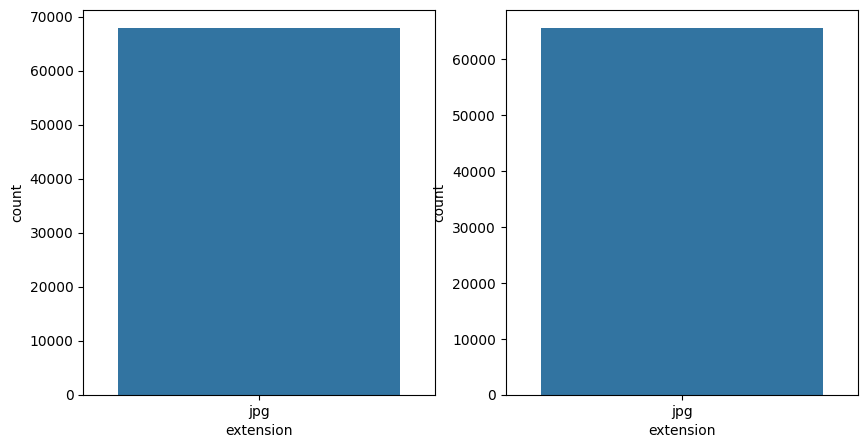

In [28]:
_,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=clasificicacion_dataset_original_train,x='extension',ax=ax[0])
sns.countplot(data=recortes_entrenamiento,x='extension',ax=ax[1])
plt.show()

In [29]:
imagenes_entrenamiento_dir = os.listdir('../../datasets/covid/recortes_cnn/train')
recortes_entrenamiento = recortes_entrenamiento[recortes_entrenamiento['filename'].isin(imagenes_entrenamiento_dir)]
left_merge_train = pd.merge(recortes_entrenamiento,clasificicacion_dataset_original_train,on='filename',how='left')
left_merge_train = left_merge_train.drop(columns=['class_x','extension_y','extension_x'])
left_merge_train = left_merge_train.rename(columns={'class_y': 'class'})
left_merge_train = left_merge_train[['filename','patient_id','class','data_source','x1','y1','x2','y2','confidence']]
print(left_merge_train.shape)
left_merge_train.head()

(65588, 9)


,filename,patient_id,class,data_source,x1,y1,x2,y2,confidence
0,bc84827e-f1af-43c8-a787-961139eb9940.jpg,bc84827e-f1af-43c8-a787-961139eb9940,negative,rsna,0.509375,0.435937,0.831250,0.603125,0.884277
1,A845985-01-16-1901-NA-CHEST_AP_PORT-99112-2.00...,A845985,positive,stonybrook,0.503125,0.656250,0.781250,0.681250,0.915039
2,sub-S322109_ses-E62447_run-1_bp-chest_vp-pa_dx...,S322109,positive,bimcv,0.578125,0.428125,0.843750,0.712500,0.880859
3,sub-S325923_ses-E69103_run-1_bp-chest_vp-pa_dx...,S325923,positive,bimcv,0.504687,0.406250,0.828125,0.675000,0.742188
4,831dbfc0-b9b0-4201-9609-ace98fa96deb.jpg,831dbfc0-b9b0-4201-9609-ace98fa96deb,negative,rsna,0.546875,0.448438,0.875000,0.709375,0.882324


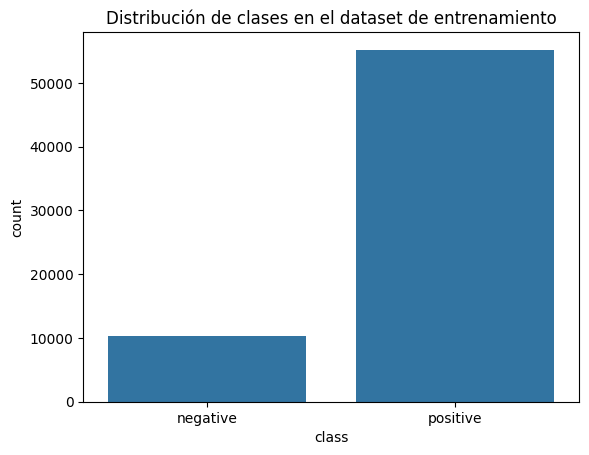

In [30]:
sns.countplot(data=left_merge_train,x='class')
plt.title('Distribución de clases en el dataset de entrenamiento')
plt.show()

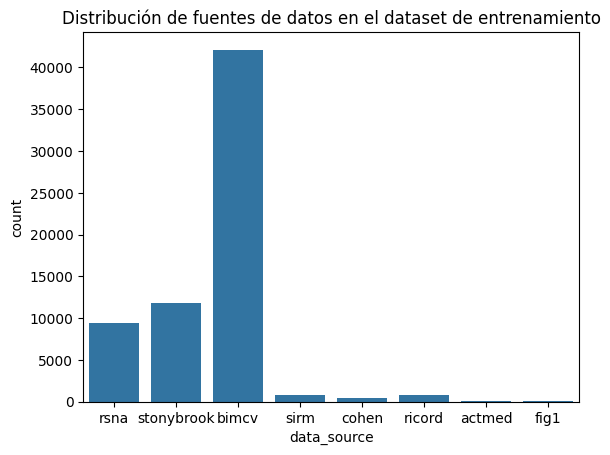

In [31]:
sns.countplot(data=left_merge_train,x='data_source')
plt.title('Distribución de fuentes de datos en el dataset de entrenamiento')
plt.show()

In [32]:
df_entrena = left_merge_train[left_merge_train['data_source'].isin(['bimcv','rsna'])]

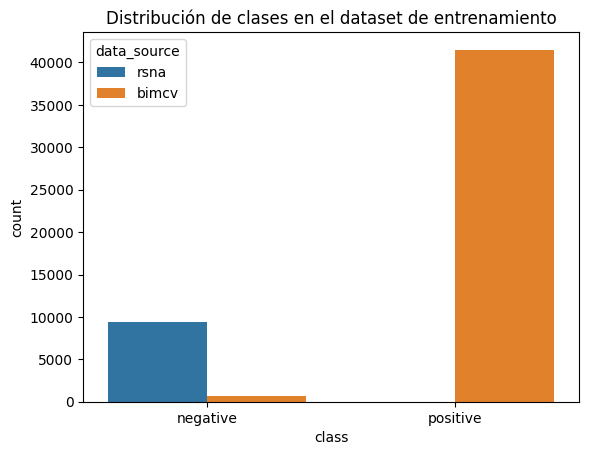

In [33]:
sns.countplot(data=df_entrena, x='class', hue='data_source')
plt.title('Distribución de clases en el dataset de entrenamiento')
plt.show()

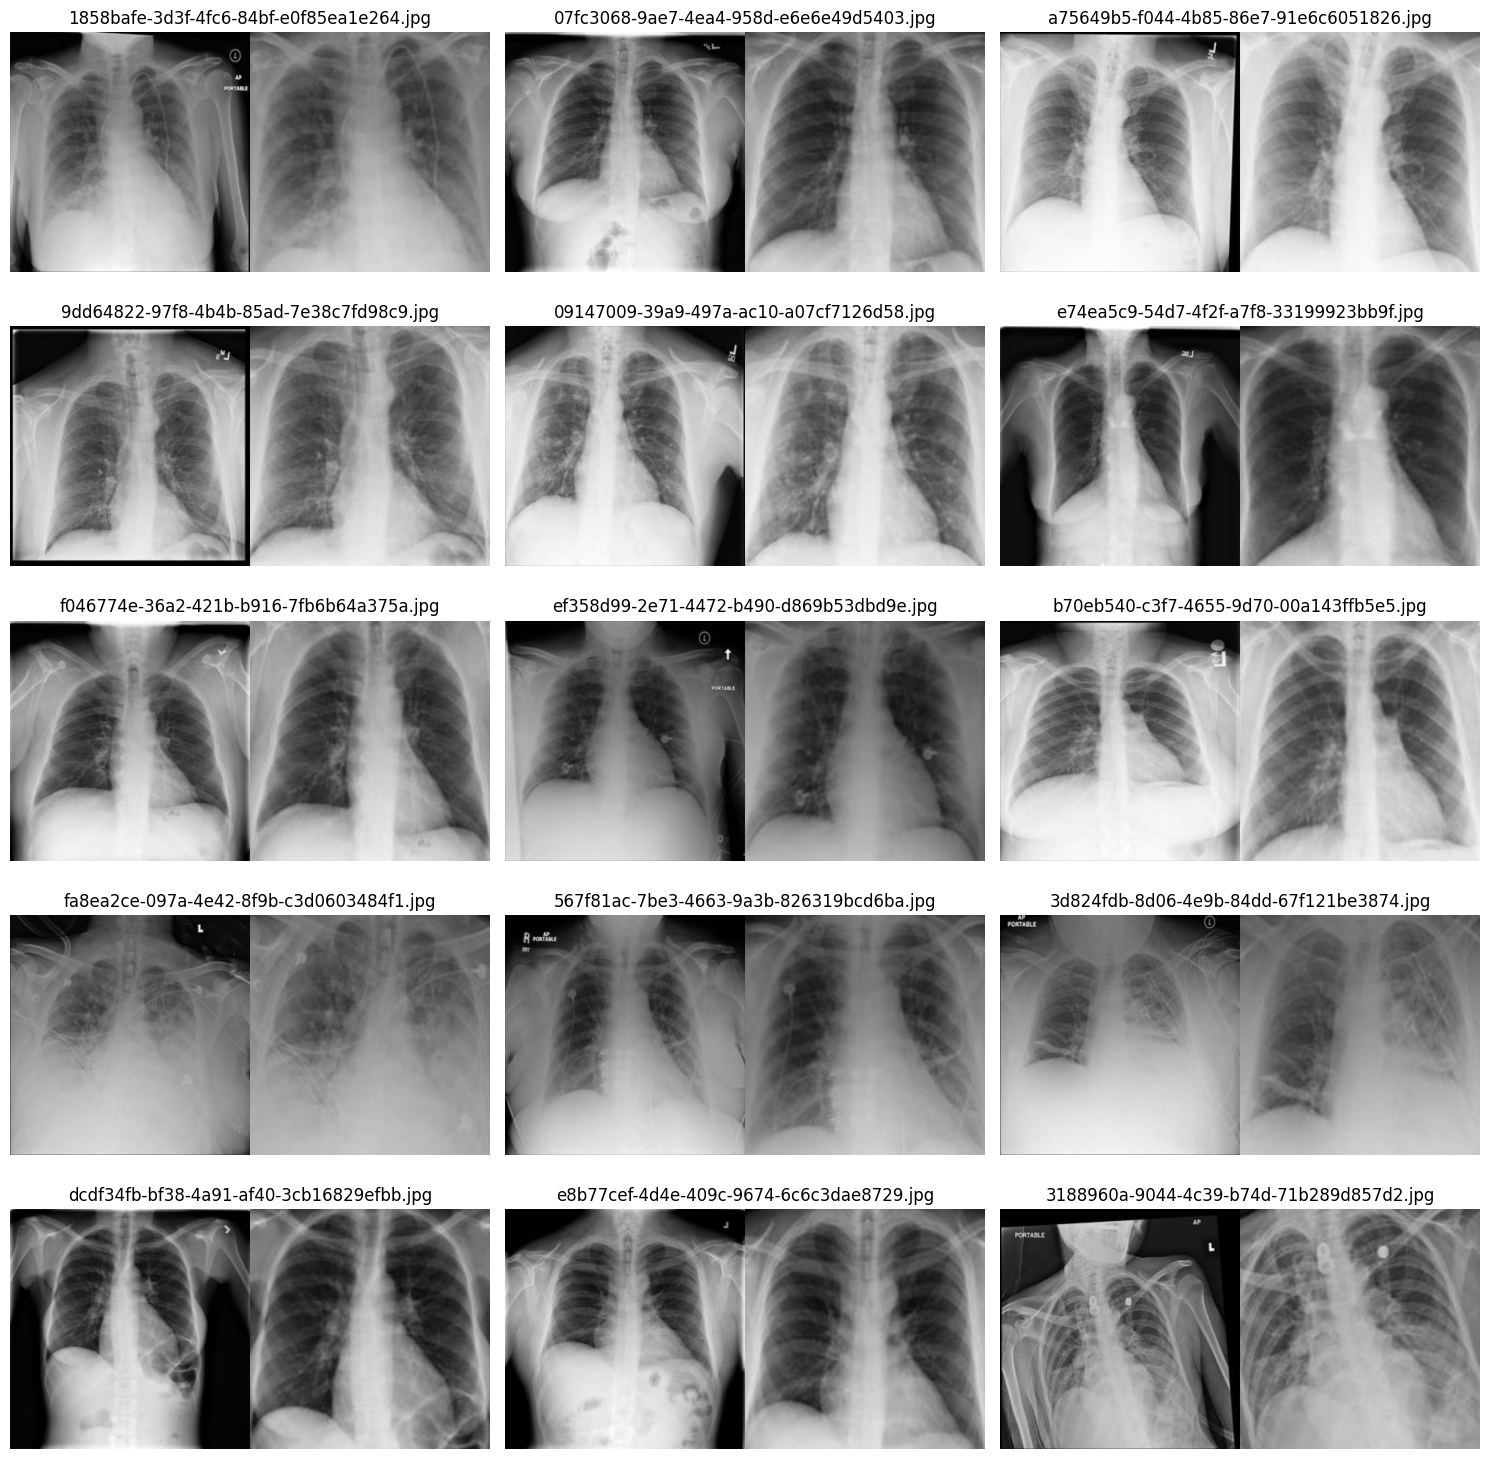

In [34]:
# imagenes de radiografias de covid de rsna mostradas
source = df_entrena[df_entrena['data_source'] == 'rsna'].sample(15)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, (_, row) in zip(axes, source.iterrows()):
    img_train = mpimg.imread(f"../../datasets/covid/recortes_cnn/train/{row['filename']}")
    img_train_pulmones = mpimg.imread(f"../../datasets/covid/recortes_cnn/train_pulmones/{row['filename']}")
    img_train_resized = resize(img_train, (320, 320), anti_aliasing=True)
    img_train_pulmones_resized = resize(img_train_pulmones, (320, 320), anti_aliasing=True)
    ax.imshow(np.hstack((img_train_resized, img_train_pulmones_resized)), cmap='gray')
    ax.set_title(row['filename'])
    ax.axis('off')

plt.tight_layout()
plt.show()


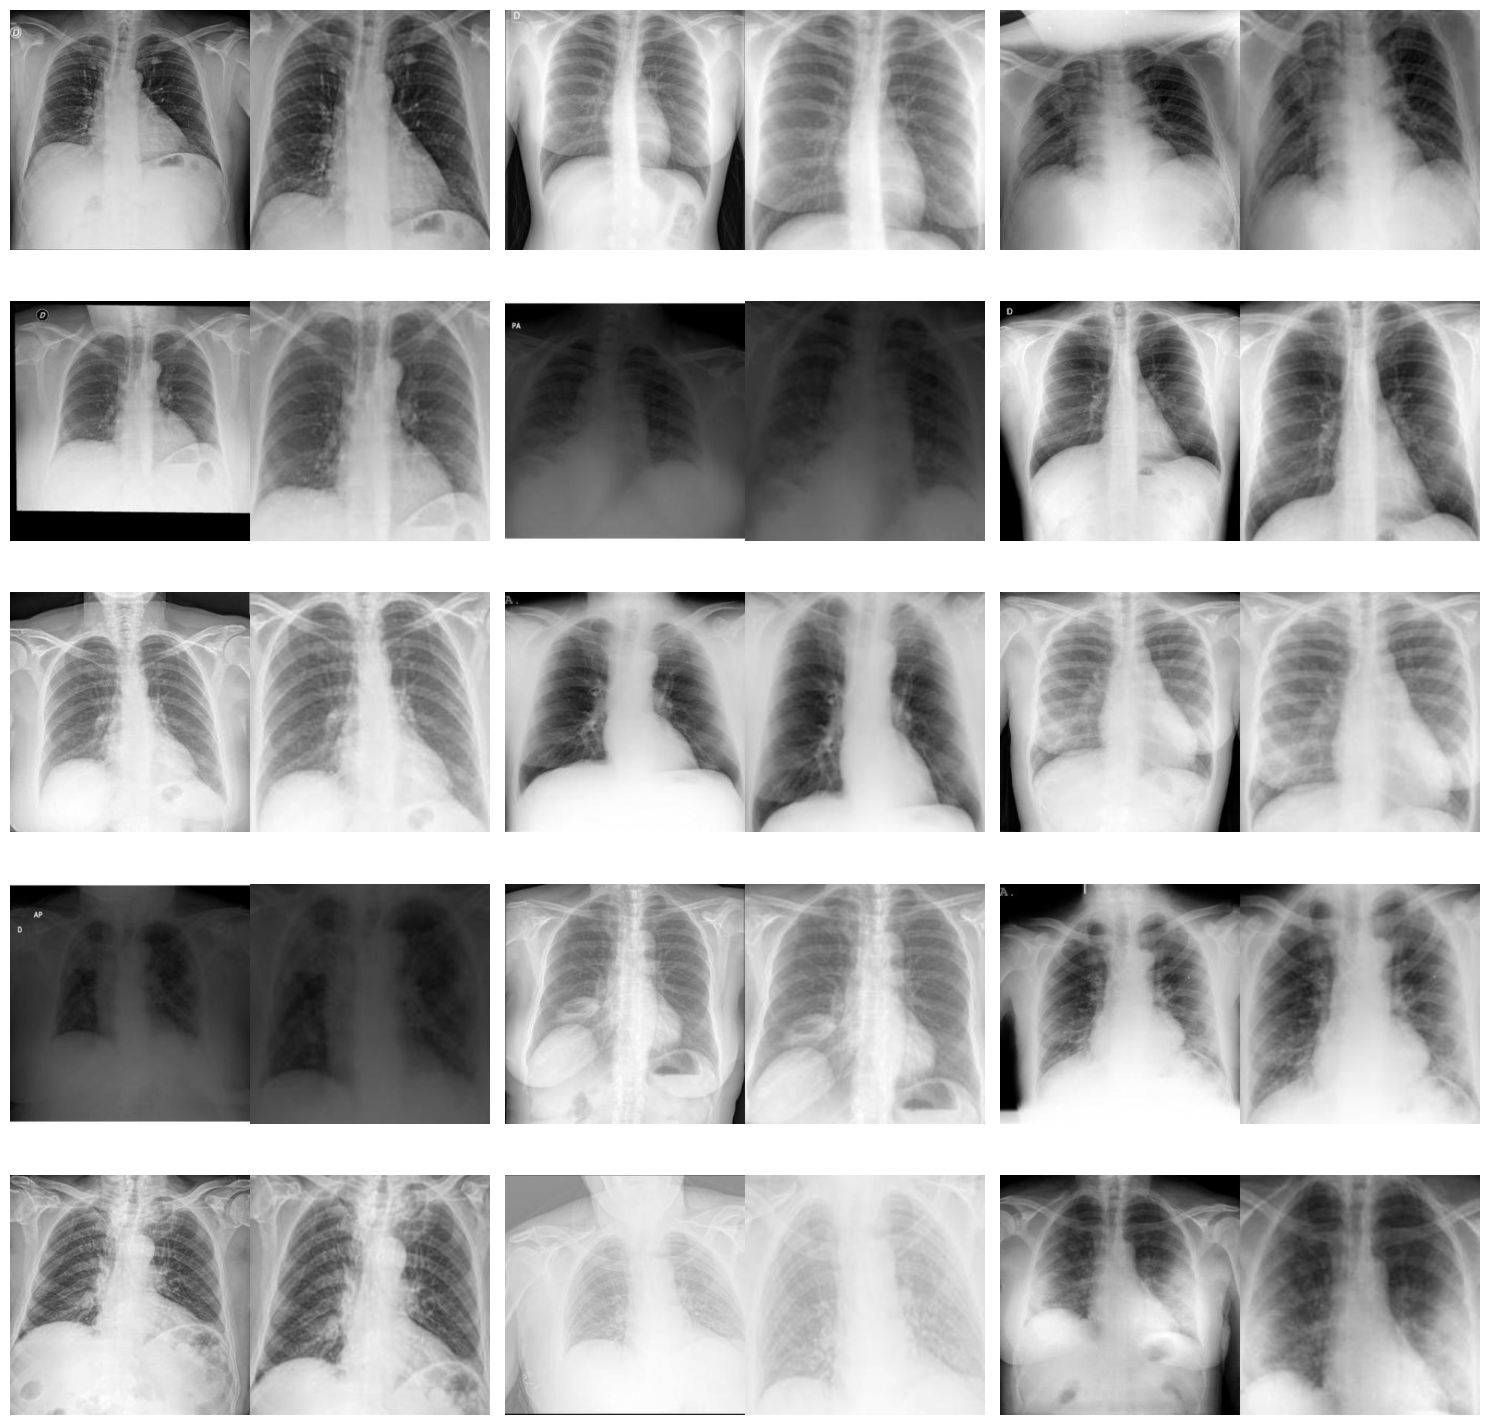

In [35]:
# imagenes de radiografias de covid de rsna mostradas
source = df_entrena[df_entrena['data_source'] == 'bimcv'].sample(15)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, (_, row) in zip(axes, source.iterrows()):
    img_train = mpimg.imread(f"../../datasets/covid/recortes_cnn/train/{row['filename']}")
    img_train_pulmones = mpimg.imread(f"../../datasets/covid/recortes_cnn/train_pulmones/{row['filename']}")
    img_train_resized = resize(img_train, (320, 320), anti_aliasing=True)
    img_train_pulmones_resized = resize(img_train_pulmones, (320, 320), anti_aliasing=True)
    ax.imshow(np.hstack((img_train_resized, img_train_pulmones_resized)), cmap='gray')
    # ax.set_title(row['filename'])
    ax.axis('off')

plt.tight_layout()
plt.show()


In [36]:
n1 = int(12_000* 0.5)
n2 = 12_000 - n1

positive_samples = df_entrena[df_entrena['class'] == 'positive'].sample(n=n1, random_state=42)
negative_samples = df_entrena[df_entrena['class'] == 'negative'].sample(n=n2, random_state=42)

df_balanceado = pd.concat([positive_samples, negative_samples]).sample(frac=1, random_state=1934).reset_index(drop=True)

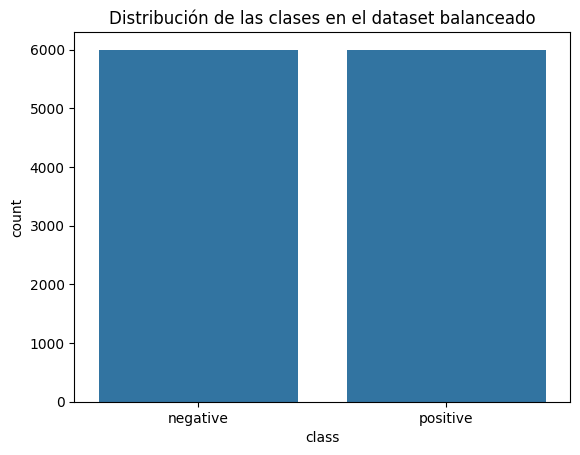

In [37]:
sns.countplot(data=df_balanceado, x='class')
plt.title('Distribución de las clases en el dataset balanceado')
plt.show()

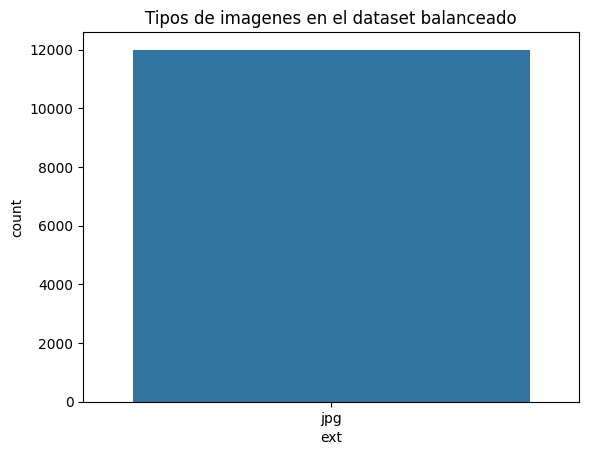

In [38]:
df_extension = df_balanceado.copy()
df_extension['ext'] = df_extension['filename'].apply(lambda x: x.split('.')[1])
sns.countplot(data=df_extension, x='ext')
plt.title('Tipos de imagenes en el dataset balanceado')
plt.show()

In [39]:
df_balanceado.to_csv('../../datasets/covid/usable/train/train.csv', index=False)

# Prueba

In [40]:
import pandas as pd
import os

# Cargar los datos
recortes_pruba_inf = pd.read_csv('../../datasets/covid/recortes_cnn/test_detect_0.7_conf.csv')
recortes_pruba_inf.columns = ['filename'] + recortes_pruba_inf.columns[1:].tolist()
clasificicacion_dataset_original_test = pd.read_csv('../../datasets/covid/test.txt', sep=' ')

# Reemplazar solo la extensión del archivo con .jpg
clasificicacion_dataset_original_test['filename'] = clasificicacion_dataset_original_test['filename'].str.replace(r'(\.[^.]+)$', '.jpg', regex=True)
recortes_pruba_inf['filename'] = recortes_pruba_inf['filename'].str.replace(r'(\.[^.]+)$', '.jpg', regex=True)
recortes_pruba_inf['extension'] = recortes_pruba_inf['filename'].str.extract(r'\.(\w+)$')[0]
clasificicacion_dataset_original_test['extension'] = clasificicacion_dataset_original_test['filename'].str.extract(r'\.(\w+)$')[0]
# Imprimir el conteo de extensiones y la forma del DataFrame
print(
    recortes_pruba_inf['extension'].value_counts(),
    clasificicacion_dataset_original_test['extension'].value_counts(),
)
print(
    recortes_pruba_inf.shape,
    clasificicacion_dataset_original_test.shape,
)
# Eliminar duplicados
clasificicacion_dataset_original_test = clasificicacion_dataset_original_test.drop_duplicates(subset='filename', keep=False)
recortes_pruba_inf = recortes_pruba_inf.drop_duplicates(subset='filename')

# Filtrar archivos que existen en el directorio
imagenes_dir = os.listdir('../../datasets/covid/recortes_cnn/test_pulmones/')
recortes_pruba_inf = recortes_pruba_inf[recortes_pruba_inf['filename'].isin(imagenes_dir)]

# Realizar el join
left_merge_test = recortes_pruba_inf.join(
    on='filename',
    other=clasificicacion_dataset_original_test.set_index('filename'),
    how='left',
    validate='one_to_one',
    lsuffix='_left',
    rsuffix='_right'
)
left_merge_test.drop(columns=['class_left','extension_left','extension_right'], inplace=True)
left_merge_test = left_merge_test[['filename', 'patient_id', 'class_right', 'data_source', 'x1', 'y1', 'x2', 'y2', 'confidence']]
left_merge_test.columns = ['filename', 'patient_id', 'class', 'data_source', 'x1', 'y1', 'x2', 'y2', 'confidence']
left_merge_test.head()

extension
jpg    8263
Name: count, dtype: int64 extension
jpg    8482
Name: count, dtype: int64
(8263, 8) (8482, 5)


,filename,patient_id,class,data_source,x1,y1,x2,y2,confidence
0,sub-S05477_ses-E10160_run-1_bp-chest_vp-ap_dx-...,S05477,negative,bimcv,0.453125,0.546875,0.906250,0.831250,0.958496
1,sub-S03331_ses-E06563_run-1_bp-chest_vp-pa_cr-...,S03331,positive,bimcv,0.498437,0.467187,0.853125,0.703125,0.713867
2,sub-S03723_ses-E07540_run-1_bp-chest_vp-ap_cr-...,S03723,positive,bimcv,0.506250,0.529688,0.956250,0.896875,0.851562
3,sub-S09520_ses-E26133_run-1_bp-chest_vp-ap_dx-...,S09520,positive,bimcv,0.387500,0.550000,0.775000,0.756250,0.925781
4,sub-S03667_ses-E60074_run-1_bp-chest_vp-pa_cr-...,S03667,positive,bimcv,0.512500,0.564062,0.975000,0.865625,0.971680


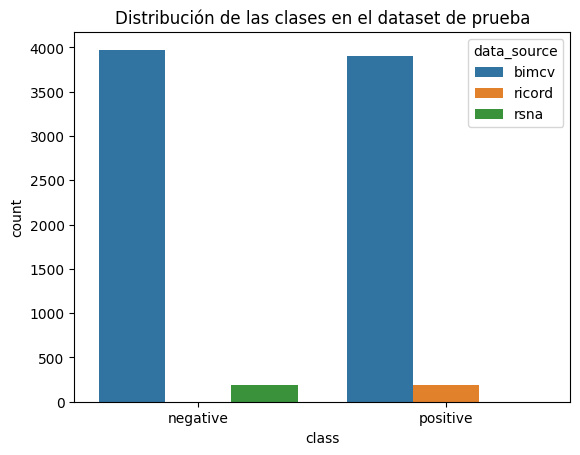

In [41]:
sns.countplot(data=left_merge_test, x='class', hue='data_source')
plt.title('Distribución de las clases en el dataset de prueba')
plt.show()

In [42]:
print(left_merge_test['class'].value_counts())

class
negative    4167
positive    4093
Name: count, dtype: int64


In [43]:
n1 = int(4_000 * 0.5)
n2 = 4_000 - n1

positive_samples = left_merge_test[left_merge_test['class'] == 'positive'].sample(n=n1, random_state=10)
negative_samples = left_merge_test[left_merge_test['class'] == 'negative'].sample(n=n2, random_state=11)

df_balanceado_pruebas = pd.concat([positive_samples, negative_samples]).sample(frac=1, random_state=1934).reset_index(drop=True)


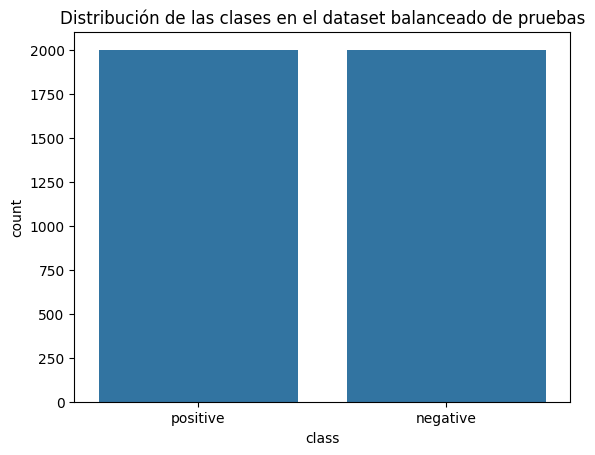

In [44]:
sns.countplot(data=df_balanceado_pruebas, x='class')
plt.title('Distribución de las clases en el dataset balanceado de pruebas')
plt.show()

In [45]:
print(df_balanceado_pruebas['class'].value_counts())

class
positive    2000
negative    2000
Name: count, dtype: int64


In [46]:
img_prueba = os.listdir('../../datasets/covid/recortes_cnn/test_pulmones/')
print(df_balanceado_pruebas.shape)
df_balanceado_pruebas = df_balanceado_pruebas[df_balanceado_pruebas['filename'].isin(img_prueba)]
print(df_balanceado_pruebas.shape)
df_balanceado_pruebas.to_csv('../../datasets/covid/usable/test/test.csv', index=False)

(4000, 9)
(4000, 9)


In [47]:
print(pd.read_csv('../../datasets/covid/usable/train/train.csv').shape)
print(pd.read_csv('../../datasets/covid/usable/test/test.csv').shape)

(12000, 9)
(4000, 9)
